<div style="position: relative; padding-bottom: 62.5%; height: 0;">
    <iframe src="https://www.loom.com/embed/b64e83298d2c411ebcde5c87175ff098" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"></iframe>
</div>

```{jupyter-info}
```

# Neural Networks Code: Digit Recognition

In this notebook, we will show how to train a model to classify handwritten digits (0-9).

First we start by importing some libraries.

In [ ]:
import math

import imageio
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

%matplotlib inline

We then load in the MNIST dataset of hand-written digits with their labels. Each example is a 28x28 grayscale image and its label is a number from 0 to 9. As we mentioned, it's common to start "unroll" images for machine learning, so the return value for the training set will be a `numpy.array` with shape `(n, 784)` where `n` is the number of examples in the dataset. 

Many machine learning algorithms require the inputs be scaled to appropriate values, so we first change the range of the pixel values to be between 0 and 1. 

In [ ]:
# Downloading the data takes a few seconds

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

Then, instead of using `train_test_split` like we would do in most situations, we separate the train data as the first 60,000 rows and the test as the remaining rows. This is generally not a good idea in practice, but this dataset is provided by the author with those rows specifically to be used as the test set.

In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(X_train.shape)

(60000, 784)


This last cell confirms the shape of the array we described earlier. We can use `reshape` to plot what the image looks like! 

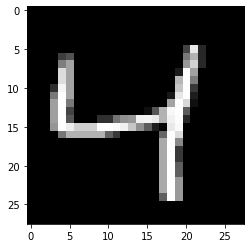

In [ ]:
plt.imshow(X[2].reshape((28, 28)), cmap=plt.cm.gray)

We then go ahead to import and create a neural network using `sklearn`. Another name for a neural network is a "multi-layer perceptron", which explains the abbreviation `MLP`.

The most important parameter to this function is the `hidden_layer_sizes` which specifies the number of hidden layers and the number of nodes that appear at each layer respectively. The remaining parameters are not as important and are there to keep the details of the output manageable. Confusingly in this paragraph, we refer these to parameters since they are Python values you are passing, when in reality they are technically our hyperparameters of the model since we are using them to specify what type of model we want!

By passing in `hidden_layer_sizes=(50,)` we are creating a neural network with one hidden layer, and that hidden layer has 50 nodes. The number of input and output neurons is determined by `sklearn` using the data you provide. So in this context, the network will have 784 input neurons, one layer of 50 neurons, and 10 output neurons (one for each digit).


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=10, verbose=10, random_state=1)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

We can then train the model on the training set and then look at what it's training and test accuracy are. Some things to notice
* While runnning `fit`, it prints out lines starting with "Iteration:". This is signifying each phase of updating the network weights based on the mis-classified examples. The number after called the "loss" is a measurement of how much error there is (but slightly different than accuracy).
* With this architecture, we get really high training and test accuracy!

*Note: You can ignore the convergence warning.*

In [ ]:
mlp.fit(X_train, y_train)
print('Training score', mlp.score(X_train, y_train))
print('Testing score', mlp.score(X_test, y_test))

Iteration 1, loss = 0.52090613
Iteration 2, loss = 0.25006049
Iteration 3, loss = 0.19728192
Iteration 4, loss = 0.16435969
Iteration 5, loss = 0.14179291
Iteration 6, loss = 0.12474275
Iteration 7, loss = 0.11050647
Iteration 8, loss = 0.09964098
Iteration 9, loss = 0.09138456
Iteration 10, loss = 0.08368557


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training score 0.9793833333333334
Testing score 0.968


These networks are very sensitive to the hyper-parameters we use (parameters that specify the algorithm or model we are using). If you go ahead and add more layers and shorten the number of nodes at each layer, you get a pretty different accuracy! In the following example, we change the architecture of the network to have 5 hidden layers of 10 nodes each.

This is one example of the complexities of neural networks! It's hard to predict how changing the architecture will affect the performance of the model. You can see in [this tool](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.81962&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) how there are tons of knobs to tune for a neural network and it's very tough to predict how the output will be affected by those settings. This leads us to our next point of trying to find the best setting of these hyper-parameters.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), 
                    max_iter=10, verbose=10, random_state=1)
mlp.fit(X_train, y_train)
print('Training score', mlp.score(X_train, y_train))
print('Testing score', mlp.score(X_test, y_test))

Iteration 1, loss = 1.45255343
Iteration 2, loss = 0.57299610
Iteration 3, loss = 0.38572560
Iteration 4, loss = 0.32854750
Iteration 5, loss = 0.30268236
Iteration 6, loss = 0.28441232
Iteration 7, loss = 0.27175338
Iteration 8, loss = 0.26216631
Iteration 9, loss = 0.25362123
Iteration 10, loss = 0.24813976


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training score 0.9289166666666666
Testing score 0.9192


## Hyperparameter Tuning
Since there is no good way of telling "what the best settings are", the only thing really left is to try them all and see which one is best.

For this example, we will try a few different network architectures as well as modifying a new parameter called the "learning rate"; this parameter essentially controls how much we update the weights by on each iteration.

The nested loop below trying every possible setting is a very common piece of code for machine learning where we have to try all combinations of the hyper-parameters.

In [ ]:
learning_rates = [0.001, 0.01, 0.5]
sizes = [(10,), (50,), (10, 10, 10, 10),]
for learning_rate in learning_rates:
    for size in sizes:
        print(f'Learning Rate {learning_rate}, Size {size}')
        mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=10,
                            random_state=1, learning_rate_init=learning_rate)
        mlp.fit(X_train, y_train)
        print("    Training set score: %f" % mlp.score(X_train, y_train))
        print("    Test set score: %f" % mlp.score(X_test, y_test))

Learning Rate 0.001, Size (10,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.935850
    Test set score: 0.932600
Learning Rate 0.001, Size (50,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.979383
    Test set score: 0.968000
Learning Rate 0.001, Size (10, 10, 10, 10)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.928017
    Test set score: 0.921700
Learning Rate 0.01, Size (10,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.922650
    Test set score: 0.915000
Learning Rate 0.01, Size (50,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.980800
    Test set score: 0.965900
Learning Rate 0.01, Size (10, 10, 10, 10)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.918150
    Test set score: 0.909000
Learning Rate 0.5, Size (10,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.102183
    Test set score: 0.101000
Learning Rate 0.5, Size (50,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.150467
    Test set score: 0.152400
Learning Rate 0.5, Size (10, 10, 10, 10)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.112367
    Test set score: 0.113500


How would we choose which hyper-parameters to use?

*   Should we use the ones that maximize the training accuracy? Not necessarily since this might just select the most complicated model that is most likely to overfit to the data.
*   Should we use the ones that maximize the test accuracy? This is a better idea since we we won't necessarily pick a model that overfit to the training set. However, this is not a good idea since it ruins the point of a test set! Why did we want the test set? We wanted a test set to let use give a good estimate of how our model will do in the future. If we picked a model that maximized the test-accuracy, this accuracy is no longer a good estimate of how it will do on future data since we chose the model that did best on that specific dataset.

So to make this work, we generally split the training set into another set called the "validation" or "dev" set that we use to pick the hyper-parameter settings. Then we can leave the test set untouched until the very end of our project. At that point, we can test our final model we selected on that test set and get an accurate estimate of its performance in the future!

## Convolutional Neural Network
Now that we have a better understanding of neural networks, we will briefly give you an idea of how that "convolutional neural network" (or CNN) we talked about in the last lesson works. A CNN is like any other neural network, but some of the layers use a special mechanism for a convolution. They treat the network weights for that layer as the the values inside the kernel, and then convolve those weights across the image to compute values.

Generally, these convolutional layers happen earlier in the network since their job is to compute low-level features in the data (e.g., "is there an edge here"). The trick is that these convolutional layers learn their weights just like any other layer, so the network can essentially learn kernels that work best for its task!